<a href="https://colab.research.google.com/github/Adeelzafar/My-Version-of-Fastai-Course/blob/main/Intro_Image_Recognition_Imdb_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 10.0 MB/s 
     |████████████████████████████████| 186 kB 31.1 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 
     |████████████████████████████████| 1.2 MB 33.7 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 51 kB 285 kB/s 
Mounted at /content/gdrive


In [3]:
from fastbook import *

In [4]:
from nbdev.showdoc import *

set_seed(2)

In [8]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)


epoch,train_loss,valid_loss,time
0,2.858485,2.382318,00:04


epoch,train_loss,valid_loss,time
0,1.867197,1.584982,00:04
1,1.593567,1.224674,00:04
2,1.442877,1.057187,00:04
3,1.304724,0.976627,00:04
4,1.181993,0.784559,00:04
5,1.071674,0.716618,00:04
6,0.978998,0.690235,00:04
7,0.907012,0.686323,00:04


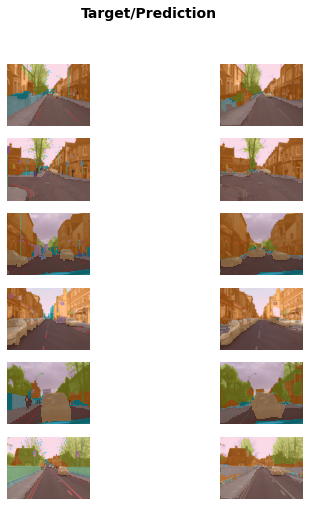

In [9]:
learn.show_results(max_n=6, figsize=(7,8))

In [10]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.463618,0.404548,0.819520,07:41


epoch,train_loss,valid_loss,accuracy,time
0,0.303027,0.238625,0.903520,14:59
1,0.240863,0.206598,0.918880,15:01
2,0.182888,0.190552,0.927160,15:01
3,0.145377,0.192412,0.928360,14:59
